In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import wimprates
import numericalunits as nu

/opt/anaconda3/lib/python3.13/site-packages/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


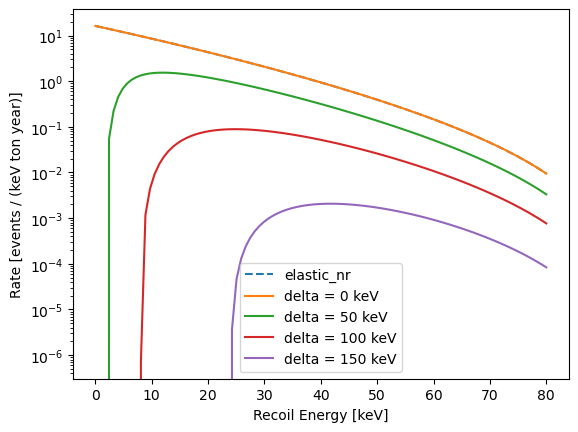

In [8]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(1e-10, 80, 100) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
)

dr_de_50 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=50  # 能级差 (keV)
)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
)

dr_de_150 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=150  # 能级差 (keV)
)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_50, label='delta = 50 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_150, label='delta = 150 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV ton year)]')
plt.legend()
plt.show()

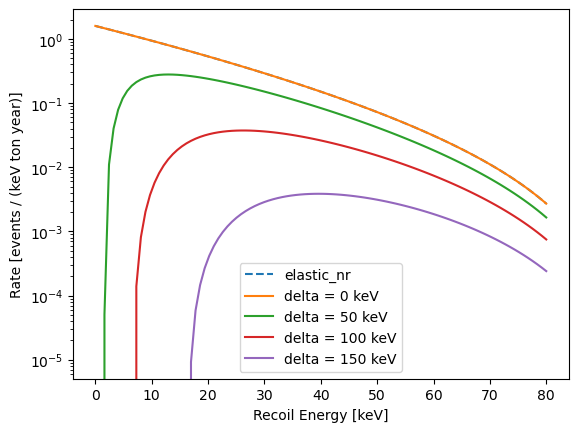

In [9]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(1e-10, 80, 100) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
)

dr_de_50 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=50  # 能级差 (keV)
)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
)

dr_de_150 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=150  # 能级差 (keV)
)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_50, label='delta = 50 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_150, label='delta = 150 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV ton year)]')
plt.legend()
plt.show()

In [10]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(1e-10, 200, 10000) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
)

dr_de_50 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=50  # 能级差 (keV)
)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
)

dr_de_150 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=150  # 能级差 (keV)
)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_50, label='delta = 50 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_150, label='delta = 150 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV ton year)]')
plt.legend()
plt.show()

KeyboardInterrupt: 

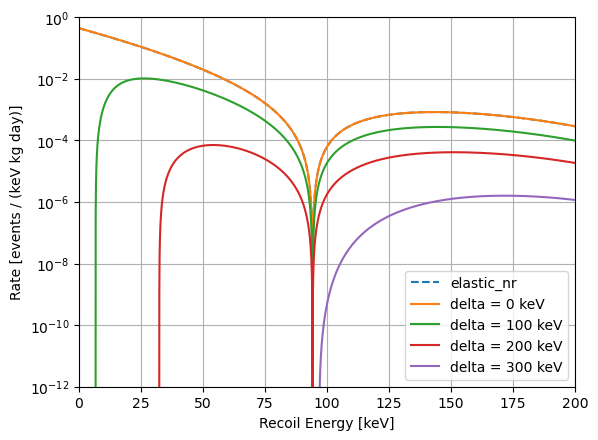

In [ ]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(1e-10, 200, 10000) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_200 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=200  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_300 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=300  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_200, label='delta = 200 keV')
plt.plot(es, dr_de_300, label='delta = 300 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV kg day)]')
plt.xlim(0, 200)
plt.ylim(1e-12, 1)
plt.legend()
plt.grid()
plt.show()

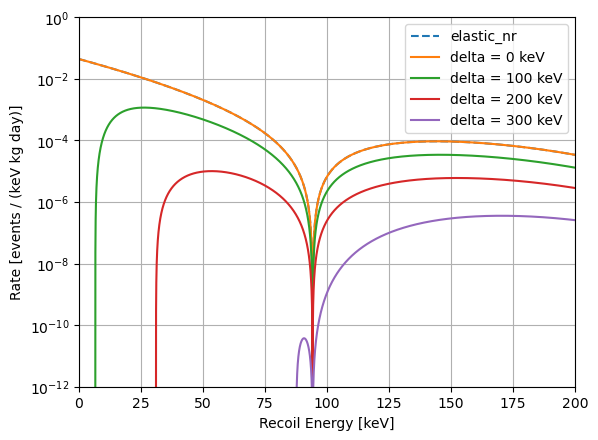

In [ ]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(1e-10, 200, 10000) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_200 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=200  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_300 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=300  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_200, label='delta = 200 keV')
plt.plot(es, dr_de_300, label='delta = 300 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV kg day)]')
plt.xlim(0, 200)
plt.ylim(1e-12, 1)
plt.legend()
plt.grid()
plt.show()

In [ ]:
nu.year/nu.day

365.256363004

In [ ]:
nu.day

2319.4226819975465

In [ ]:
help(wimprates.rate_wimp_std)

Help on function rate_wimp_std in module wimprates.summary:

rate_wimp_std(es, mw, sigma_nucleon, m_med=inf, t=None, **kwargs)
    Differential rate per (ton year keV) of WIMP-nucleus scattering.
    :param es: Recoil energies in keV
    :param mw: WIMP mass in GeV/c^2
    :param sigma_nucleon: WIMP-nucleon cross-section in cm^2
    :param m_med: Medator mass in GeV/c^2. If not given, assumed very heavy.
    :param t: A J2000.0 timestamp. If not given,
    conservative velocity distribution is used.
    :returns: numpy array of same length as es
    
    Further arguments are as for rate_wimp; see docstring of rate_wimp.



In [ ]:
help(wimprates.rate_wimp)

Help on function rate_wimp in module wimprates.summary:

rate_wimp(es, mw, sigma_nucleon, interaction='SI', detection_mechanism='elastic_nr', m_med=inf, t=None, progress_bar=False, **kwargs)
    Differential rate per unit time, unit detector mass
    and unit recoil energy of WIMP-nucleus scattering.
    Use numericalunits to get variables in/out in the right units.
    
    :param es: Energy of recoil (for elastic_nr)
    or emitted photon(for bremsstrahlung and Migdal)
    :param mw: Mass of WIMP
    :param sigma_nucleon: WIMP-nucleon cross-section
    :param interaction: string describing DM-nucleus interaction. Options:
        'SI' for spin-independent scattering;
            equal coupling to protons and neutrons.
        'SD_n_xxx' for spin-dependent scattering
            n can be 'n' or 'p' for neutron or proton coupling (at first order)
            x can be 'central', 'up' or 'down' for
                theoretical uncertainty on structure function.
    :param detection_mechan

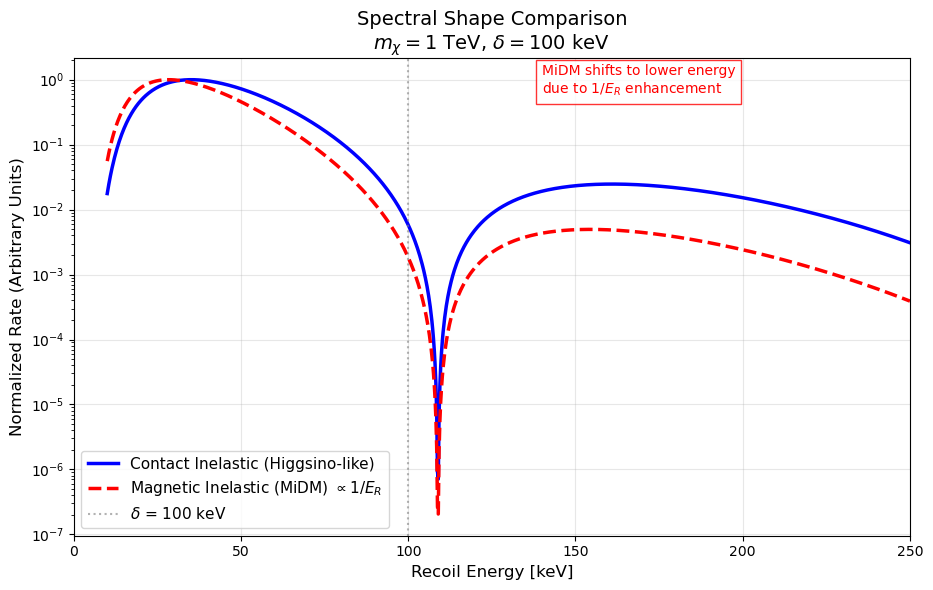

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. 物理常数与参数设置
# ==========================================
c_kms = 299792.458   # 光速 (km/s)
v_esc = 544.0        # 银河系逃逸速度 (km/s)
v_earth = 232.0      # 地球速度 (km/s)
v_0 = 220.0          # 晕弥散速度 (km/s)

# 原子核参数 (Xenon)
A = 131.3
m_N_amu = 131.3
amu_to_keV = 931494.0 
m_N_keV = m_N_amu * amu_to_keV

# WIMP 参数
m_chi_GeV = 1000.0           # 1 TeV
m_chi_keV = m_chi_GeV * 1e6
delta_keV = 100.0            # 质量分裂 delta = 100 keV

# 约化质量 (Reduced Mass)
mu_keV = (m_N_keV * m_chi_keV) / (m_N_keV + m_chi_keV)


# ==========================================
# 2. 物理公式函数
# ==========================================

def get_vmin(E_R_keV):
    """
    计算非弹性散射所需的最小速度 v_min
    v_min = (1 / sqrt(2*m_N*E_R)) * (m_N*E_R/mu + delta)
    """
    # 避免 E_R = 0 导致除零错误
    E_safe = np.maximum(E_R_keV, 1e-5)
    
    term1 = 1.0 / np.sqrt(2 * m_N_keV * E_safe)
    term2 = (m_N_keV * E_safe / mu_keV) + delta_keV
    
    # 结果乘以光速 c 转换为 km/s
    return term1 * term2 * c_kms

def get_velocity_integral(vmin):
    """
    标准晕模型 (SHM) 的速度积分 eta(vmin) 的解析近似。
    这里使用截断的麦克斯韦分布近似。
    """
    # 简单的 SHM 拖尾近似: ~ exp(-v^2) - exp(-vesc^2)
    # 考虑地球速度后的有效阈值处理
    
    # 注意：这是一个用于展示谱形的简化积分，不做精确调制计算
    # 在 v_min > v_esc + v_earth 时积分为 0
    mask = vmin < (v_esc + v_earth)
    
    # 核心形状因子
    term = np.exp(-vmin**2 / v_0**2) - np.exp(-(v_esc + v_earth)**2 / v_0**2)
    
    # 保证非负
    return np.maximum(0, term) * mask

def get_helm_form_factor_squared(E_R_keV):
    """
    计算 Helm 形状因子 F^2(E_R)
    """
    # 动量转移 q [fm^-1]
    # 1 fm^-1 approx 197.3 MeV approx 197300 keV
    hbarc_keV_fm = 197327.0
    
    q_keV = np.sqrt(2 * m_N_keV * E_R_keV)
    q_fm = q_keV / hbarc_keV_fm
    
    # 核半径参数
    s = 0.9
    r = 1.14 * A**(1.0/3.0)
    rn = np.sqrt(r**2 - 5 * s**2)
    
    qr = q_fm * rn
    qs = q_fm * s
    
    # 球贝塞尔函数 j1(x) = (sin(x) - xcos(x))/x^2
    # 注意 Helm 公式里有个 3/qr ...
    # F(q) = 3 * j1(qr) / (qr) * exp(...)
    
    # 避免 qr=0
    qr = np.maximum(qr, 1e-5)
    j1 = (np.sin(qr) - qr * np.cos(qr)) / qr**2
    
    F = (3 * j1 / qr) * np.exp(-0.5 * qs**2)
    return F**2


# ==========================================
# 3. 主计算逻辑
# ==========================================

# 设置能量范围 (keV)
es = np.linspace(10, 250, 1000)

# 计算通用部分
vmins = get_vmin(es)
eta = get_velocity_integral(vmins)
ff2 = get_helm_form_factor_squared(es)

# --- 模型 A: Contact Inelastic (Higgsino-like) ---
# dR/dE ~ eta * F^2
rate_contact = eta * ff2

# --- 模型 B: MiDM (Magnetic Inelastic) ---
# dR/dE ~ (1/E) * eta * F^2
# 偶极相互作用引入 1/E_R 增强
rate_midm = (1.0 / es) * rate_contact


# ==========================================
# 4. 绘图与归一化
# ==========================================

plt.figure(figsize=(9, 6))

# 为了比较形状，我们将两者归一化到峰值为 1
norm_contact = rate_contact / np.max(rate_contact)
norm_midm = rate_midm / np.max(rate_midm)

plt.plot(es, norm_contact, label=r'Contact Inelastic (Higgsino-like)', 
         color='blue', linewidth=2.5)
plt.plot(es, norm_midm, label=r'Magnetic Inelastic (MiDM) $\propto 1/E_R$', 
         color='red', linestyle='--', linewidth=2.5)

# 标注 delta 位置
plt.axvline(delta_keV, color='gray', linestyle=':', alpha=0.6, label=f'$\delta$ = {int(delta_keV)} keV')

plt.title(f'Spectral Shape Comparison\n$m_\chi = 1$ TeV, $\delta = {int(delta_keV)}$ keV', fontsize=14)
plt.xlabel('Recoil Energy [keV]', fontsize=12)
plt.ylabel('Normalized Rate (Arbitrary Units)', fontsize=12)
plt.xlim(0, 250)
plt.yticks([]) # 隐藏 Y 轴刻度，因为是任意单位

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# 添加文字说明
plt.text(140, 0.6, "MiDM shifts to lower energy\ndue to $1/E_R$ enhancement", 
         color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.tight_layout()
plt.yscale('log')
plt.show()

In [ ]:
nu.GeV

1.01020223288876e-15

In [ ]:
nu.keV

1.01020223288876e-21

In [ ]:
nu.amu

9.984261425990929e-28

In [ ]:
nu.c0

970814.4796040112

In [ ]:
nu.GeV/nu.c0/nu.c0

1.0718544954963517e-27

In [ ]:
nu.year

1010933630.831685

In [ ]:
nu.day

2767737.220283864

In [ ]:
nu.year/nu.day

365.256363004

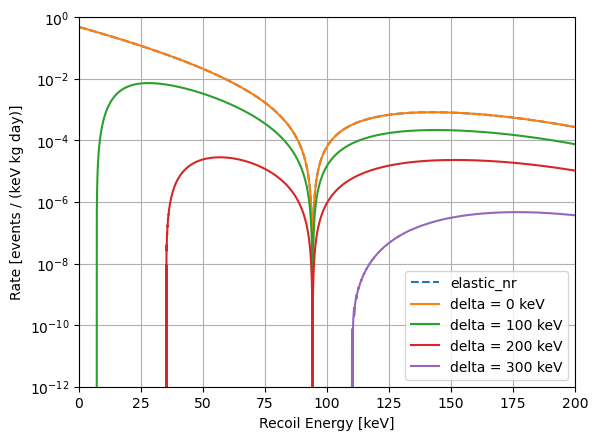

In [3]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

halo_model = wimprates.StandardHaloModel(v_0=220, v_lab=232)

es = np.linspace(1e-10, 200, 10000) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    halo_model=halo_model,
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=100  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_200 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=200  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_300 = wimprates.rate_wimp_std(
    es,
    mw=1000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=300  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_200, label='delta = 200 keV')
plt.plot(es, dr_de_300, label='delta = 300 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV kg day)]')
plt.xlim(0, 200)
plt.ylim(1e-12, 1)
plt.legend()
plt.grid()
plt.show()

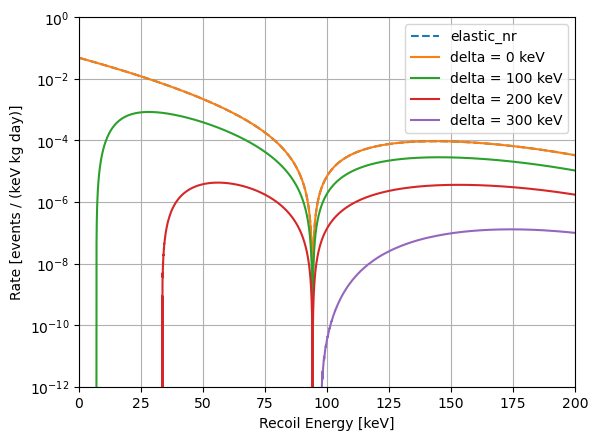

In [4]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

halo_model = wimprates.StandardHaloModel(v_0=220, v_lab=232)

es = np.linspace(1e-10, 200, 10000) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    halo_model=halo_model,
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=100  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_200 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=200  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

dr_de_300 = wimprates.rate_wimp_std(
    es,
    mw=10000,       # mass of wimp (GeV)
    sigma_nucleon=1e-40, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    halo_model=halo_model,
    delta=300  # 能级差 (keV)
) / 1000 / (nu.year/nu.day)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_200, label='delta = 200 keV')
plt.plot(es, dr_de_300, label='delta = 300 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV kg day)]')
plt.xlim(0, 200)
plt.ylim(1e-12, 1)
plt.legend()
plt.grid()
plt.show()

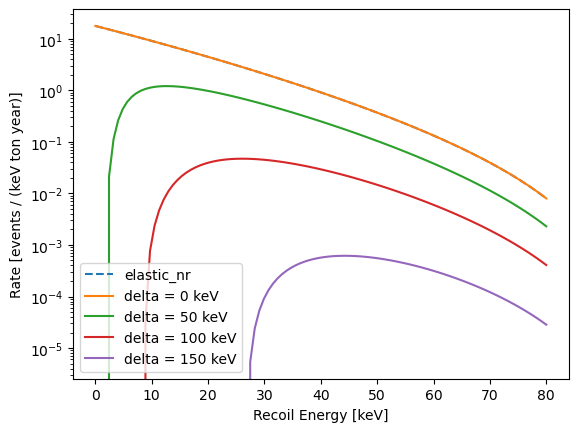

In [ ]:
import wimprates
import numpy as np
import matplotlib.pyplot as plt

es = np.linspace(1e-10, 80, 100) # 能量范围 0.1 - 50 keV

dr_de_0 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=0  # 能级差 (keV)
)

dr_de = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    #detection_mechanism='inelastic_nr',
    #delta=0  # 能级差 (keV)
)

dr_de_50 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=50  # 能级差 (keV)
)

dr_de_100 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=100  # 能级差 (keV)
)

dr_de_150 = wimprates.rate_wimp_std(
    es,
    mw=100,       # mass of wimp (GeV)
    sigma_nucleon=1e-45, # cross section (cm^2)
    material='Xe', # target material
    detection_mechanism='inelastic_nr',
    delta=150  # 能级差 (keV)
)

plt.plot(es, dr_de, label='elastic_nr', linestyle='--')
plt.plot(es, dr_de_0, label='delta = 0 keV')
plt.plot(es, dr_de_50, label='delta = 50 keV')
plt.plot(es, dr_de_100, label='delta = 100 keV')
plt.plot(es, dr_de_150, label='delta = 150 keV')

plt.yscale('log')
plt.xlabel('Recoil Energy [keV]')
plt.ylabel('Rate [events / (keV ton year)]')
plt.legend()
plt.show()